In [1]:
import cv2
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
label_dir = pathlib.Path('C:/Users/Niklas Berens/sciebo/own vsa/OptimizeCFA/takes/or/labeling/')

Processed: 01.orange.png
Processed: 02.carrot.png


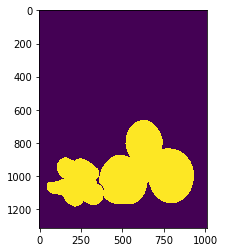

In [3]:
background = None
for file in label_dir.iterdir():
    # don't consider background
    if 'background' in file.name:
        continue
    img = Image.open(file)
    if background is None:
        background=np.zeros_like(img).astype(int).sum(axis=2)
    
    mask = np.sum(img, axis=2)
    mask = (mask==np.max(mask)).astype(int)
    background += mask
    print(f'Processed: {file.name}')

mask_bg = background.astype(bool)
plt.imshow(mask_bg)

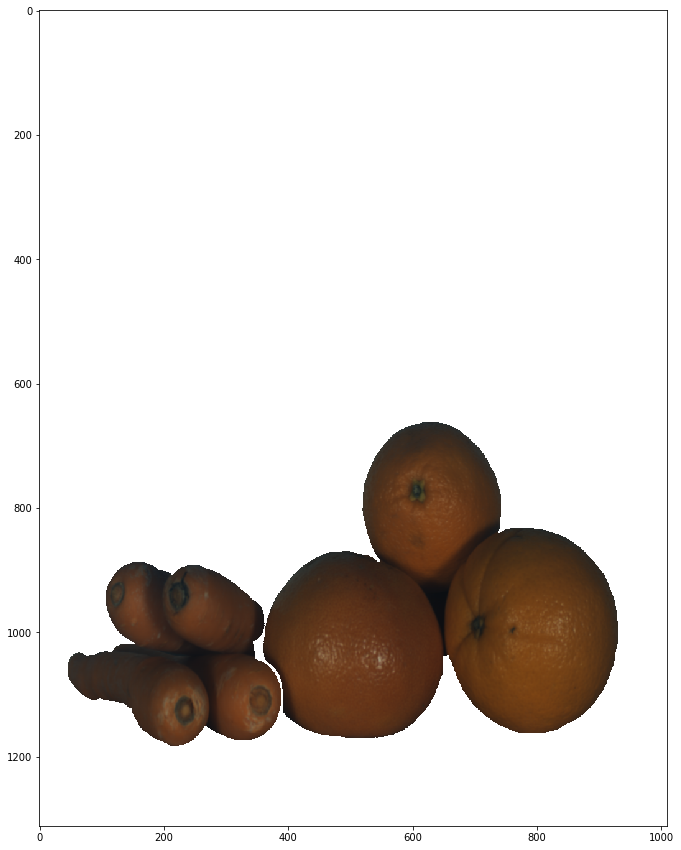

In [5]:
raw_img = Image.open('C:/Users/Niklas Berens/sciebo/own vsa/OptimizeCFA/takes/or/raw_darker.png')
np_img = np.array(raw_img)
masked_img = np_img * np.expand_dims(mask_bg,2)
masked_img[masked_img.sum(2) == 0] = 255
plt.figure(figsize=(15,15))
plt.imshow(masked_img)
plt.imsave(f'{label_dir}/00.background.png',masked_img)